<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/ANalysSent_Bill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string
import re

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
datos = pd.read_csv("datos_tweets_BillGates.csv")

In [6]:
datos.head()

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,BillGates,50393960,2017-11-09T20:09:06Z,9.287161e+17,Tanzania hopes to eliminate one of the world’s...,608,2483,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BillGates,50393960,2017-11-08T16:39:30Z,9.283010e+17,"By investing in R&amp;D, I know we can discove...",1090,5321,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BillGates,50393960,2017-11-07T17:43:05Z,9.279546e+17,This unusual tool for fighting disease turns o...,830,4653,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BillGates,50393960,2017-11-02T17:42:19Z,9.261424e+17,My first trip to Africa with Melinda was the c...,1421,10944,False,NaN,False,...,MyGivingStory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BillGates,50393960,2017-10-30T04:01:05Z,9.248486e+17,"“The death that didn’t happen is not visible.""...",918,3508,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print('Número de tweets @BillGates: ' + str(datos.shape[0]))

Número de tweets @BillGates: 2087


In [9]:
datos = datos[['screen_name', 'created_at', 'status_id', 'text']]

In [11]:
datos.columns = ['autor', 'fecha', 'id', 'texto']

In [12]:
datos['fecha'] = pd.to_datetime(datos['fecha'])
datos.head(3)

,autor,fecha,id,texto
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,Tanzania hopes to eliminate one of the world’s...
1,BillGates,2017-11-08 16:39:30+00:00,9.283010e+17,"By investing in R&amp;D, I know we can discove..."
2,BillGates,2017-11-07 17:43:05+00:00,9.279546e+17,This unusual tool for fighting disease turns o...


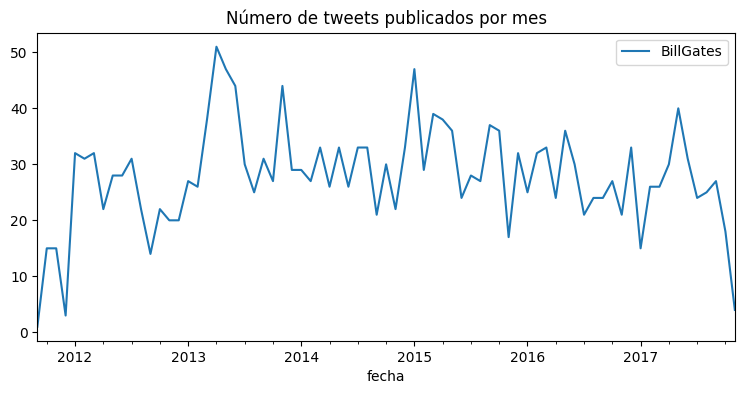

In [13]:
fig, ax = plt.subplots(figsize=(9,4))

for autor in datos.autor.unique():
    df_temp = datos[datos['autor'] == autor].copy()
    df_temp['fecha'] = pd.to_datetime(df_temp['fecha'].dt.strftime('%Y-%m'))
    df_temp = df_temp.groupby(df_temp['fecha']).size()
    df_temp.plot(label=autor, ax=ax)

ax.set_title('Número de tweets publicados por mes')
ax.legend();

In [ ]:
#Limpieza y tokenizacion de tweets

In [16]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"
print(test)
print(limpiar_tokenizar(texto=test))

Esto es 1 ejemplo de l'limpieza de TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining
['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [ ]:
#aplicación de limpieza a tweets

In [17]:
datos['texto_tokenizado'] = datos['texto'].apply(lambda x: limpiar_tokenizar(x))
datos[['texto', 'texto_tokenizado']].head()

,texto,texto_tokenizado
0,Tanzania hopes to eliminate one of the world’s...,"[tanzania, hopes, to, eliminate, one, of, the,..."
1,"By investing in R&amp;D, I know we can discove...","[by, investing, in, amp, know, we, can, discov..."
2,This unusual tool for fighting disease turns o...,"[this, unusual, tool, for, fighting, disease, ..."
3,My first trip to Africa with Melinda was the c...,"[my, first, trip, to, africa, with, melinda, w..."
4,"“The death that didn’t happen is not visible.""...","[“the, death, that, didn’t, happen, is, not, v..."


In [18]:
tweets_tidy = datos.explode(column='texto_tokenizado')
tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy = tweets_tidy.rename(columns={'texto_tokenizado':'token'})

In [19]:
tweets_tidy

,autor,fecha,id,token
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,tanzania
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,hopes
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,to
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,eliminate
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,one
...,...,...,...,...
2086,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,efforts
2086,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,to
2086,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,finish
2086,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,the


In [20]:
print('--------------------------')
print('Palabras totales por autor')
print('--------------------------')
tweets_tidy.groupby(by='autor')['token'].count()

--------------------------
Palabras totales por autor
--------------------------


autor
BillGates    31500
Name: token, dtype: int64

In [21]:
# Palabras distintas utilizadas por cada autor
# ==============================================================================
print('----------------------------')
print('Palabras distintas por autor')
print('----------------------------')
tweets_tidy.groupby(by='autor')['token'].nunique()

----------------------------
Palabras distintas por autor
----------------------------


autor
BillGates    4848
Name: token, dtype: int64

In [22]:
temp_df = pd.DataFrame(tweets_tidy.groupby(by = ["autor", "id"])["token"].count())
temp_df.reset_index().groupby("autor")["token"].agg(['mean', 'std'])

,mean,std
autor,,
BillGates,15.144231,3.347354


In [23]:
# Top 5 palabras más utilizadas por cada autor
# ==============================================================================
tweets_tidy.groupby(['autor','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('autor') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

autor token  count
autor                                 
BillGates 4195  BillGates   the   1178
          4271  BillGates    to   1115
          2930  BillGates    of    669
          2084  BillGates    in    590
          2207  BillGates    is    452

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
# Obtención de listado de stopwords del inglés
# ==============================================================================
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [29]:
#excluir stopdwords
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

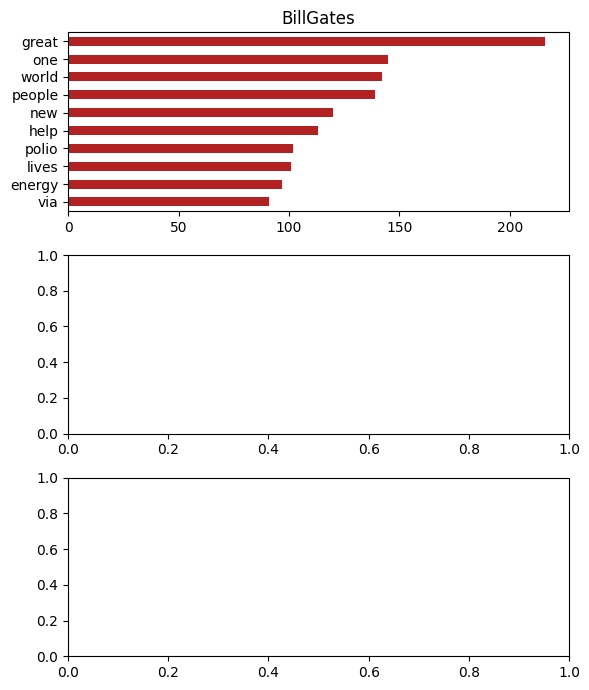

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(6, 7))
for i, autor in enumerate(tweets_tidy.autor.unique()):
    df_temp = tweets_tidy[tweets_tidy.autor == autor]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(autor)

fig.tight_layout()

In [31]:
# Cálculo term-frecuency (tf)
# ==============================================================================
tf = tweets_tidy.copy()
# Número de veces que aparece cada término en cada tweet
tf = tf.groupby(["id", "token"])["token"].agg(["count"]).reset_index()
# Se añade una columna con el total de términos por tweet
tf['total_count'] = tf.groupby('id')['count'].transform(sum)
# Se calcula el tf
tf['tf'] = tf["count"] / tf["total_count"]
tf.sort_values(by = "tf").head(3)

,id,token,count,total_count,tf
4603,3.253799e+17,epidemic,1,16,0.0625
1933,2.122278e+17,hard,1,16,0.0625
1932,2.122278e+17,gawande,1,16,0.0625


In [32]:
idf = tweets_tidy.copy()
total_documents = idf["id"].drop_duplicates().count()
# Número de documentos (tweets) en los que aparece cada término
idf = idf.groupby(["token", "id"])["token"].agg(["count"]).reset_index()
idf['n_documentos'] = idf.groupby('token')['count'].transform(sum)
# Cálculo del idf
idf['idf'] = np.log(total_documents / idf['n_documentos'])
idf = idf[["token","n_documentos", "idf"]].drop_duplicates()
idf.sort_values(by="idf").head(3)

,token,n_documentos,idf
6522,great,216,2.264845
11776,one,145,2.663389
18571,world,142,2.684296


In [33]:
tf_idf = pd.merge(left=tf, right=idf, on="token")
tf_idf["tf_idf"] = tf_idf["tf"] * tf_idf["idf"]
tf_idf.sort_values(by="id").head()

,id,token,count,total_count,tf,n_documentos,idf,tf_idf
0,1.195196e+17,efforts,1,13,0.076923,8,5.560682,0.427745
292,1.195196e+17,support,1,13,0.076923,50,3.728100,0.286777
340,1.195196e+17,toward,1,13,0.076923,6,5.848364,0.449874
96,1.195196e+17,polio,1,13,0.076923,102,3.015150,0.231935
82,1.195196e+17,phenomenal,1,13,0.076923,14,5.001066,0.384697


In [34]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [35]:
# Sentimiento promedio de cada tweet
# ==============================================================================
tweets_sentimientos = pd.merge(
                            left     = tweets_tidy,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "termino",
                            how      = "inner"
                      )

tweets_sentimientos = tweets_sentimientos.drop(columns = "termino")

# Se suman los sentimientos de las palabras que forman cada tweet.
tweets_sentimientos = tweets_sentimientos[["autor","fecha", "id", "sentimiento"]] \
                      .groupby(["autor", "fecha", "id"])\
                      .sum().reset_index()
tweets_sentimientos.head()

,autor,fecha,id,sentimiento
0,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,6
1,BillGates,2011-10-04 19:06:05+00:00,1.213001e+17,-3
2,BillGates,2011-10-06 00:37:29+00:00,1.217459e+17,3
3,BillGates,2011-10-06 00:38:09+00:00,1.217460e+17,6
4,BillGates,2011-10-19 22:12:21+00:00,1.267828e+17,3


In [36]:
def perfil_sentimientos(df):
    print(autor)
    print("=" * 12)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

for autor, df in tweets_sentimientos.groupby("autor"):
    perfil_sentimientos(df)

BillGates
Positivos: 79.88
Neutros  : 4.59
Negativos: 15.52
 


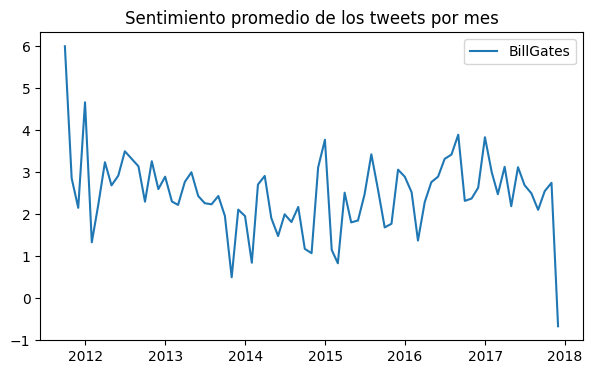

In [37]:
fig, ax = plt.subplots(figsize=(7, 4))

for autor in tweets_sentimientos.autor.unique():
    df = tweets_sentimientos[tweets_sentimientos.autor == autor].copy()
    df = df.set_index("fecha")
    df = df[['sentimiento']].resample('1M').mean()
    ax.plot(df.index, df.sentimiento, label=autor)

ax.set_title("Sentimiento promedio de los tweets por mes")
ax.legend();